In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

In [2]:
def reduce_mem_usage(df):
    """
    iterate through all the columns of a dataframe and modify the data type to reduce memory usage.
    @param df:
    @return:
    """
    start_mem = df.memory_usage().sum()
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')
            df[col] = df[col].astype('str')

    end_mem = df.memory_usage().sum()
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    return df

In [3]:
path = '../input/'
train = pd.read_csv(path + 'train.csv')
test = pd.read_csv(path + 'test.csv')

In [4]:
train.columns = ['time', 'year', 'month', 'day', 'hour', 'min', 'sec', 'outdoorTemp', 'outdoorHum', 'outdoorAtmo',
                 'indoorHum', 'indoorAtmo', 'temperature']
test.columns = ['time', 'year', 'month', 'day', 'hour', 'min', 'sec', 'outdoorTemp', 'outdoorHum', 'outdoorAtmo',
                'indoorHum', 'indoorAtmo']

In [5]:
train.shape, test.shape

((25497, 13), (406, 12))

In [6]:
train = train[train['temperature'].notnull()]

In [7]:
train['year'].unique(), test['year'].unique()

(array([2019], dtype=int64), array([2019], dtype=int64))

In [8]:
train['month'].unique(), test['month'].unique()

(array([3, 4], dtype=int64), array([4], dtype=int64))

In [9]:
train['day'].unique(), test['day'].unique()

(array([14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30,
        31,  1,  2,  3], dtype=int64),
 array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13], dtype=int64))

In [10]:
train.groupby('time').size()

time
1552496443    1
1552496503    1
1552496565    1
1552496624    1
1552496682    1
             ..
1554224151    1
1554224212    1
1554224272    1
1554224332    1
1554224391    1
Length: 24807, dtype: int64

In [11]:
train['indoorHum-outdoorHum'] = train['indoorHum'] - train['outdoorHum']
train['indoorAtmo-outdoorAtmo'] = train['indoorAtmo'] - train['outdoorAtmo']
train['temperature-outdoorTemp'] = train['temperature'] - train['outdoorTemp']

test['indoorHum-outdoorHum'] = test['indoorHum'] - test['outdoorHum']
test['indoorAtmo-outdoorAtmo'] = test['indoorAtmo'] - test['outdoorAtmo']

In [12]:
train.head().append(train.tail())

,time,year,month,day,hour,min,sec,outdoorTemp,outdoorHum,outdoorAtmo,indoorHum,indoorAtmo,temperature,indoorHum-outdoorHum,indoorAtmo-outdoorAtmo,temperature-outdoorTemp
0,1552496443,2019,3,14,1,0,43,14.6,85.0,993.1,80.0,992.4,15.4,-5.0,-0.7,0.8
1,1552496503,2019,3,14,1,1,43,14.7,84.0,993.0,80.0,992.6,15.4,-4.0,-0.4,0.7
2,1552496565,2019,3,14,1,2,45,14.7,84.0,992.7,80.0,992.8,15.4,-4.0,0.1,0.7
3,1552496624,2019,3,14,1,3,44,14.6,85.0,993.2,80.0,992.6,15.4,-5.0,-0.6,0.8
4,1552496682,2019,3,14,1,4,42,14.6,85.0,992.7,80.0,992.6,15.3,-5.0,-0.1,0.7
25492,1554224151,2019,4,3,0,55,51,17.3,78.0,983.8,75.0,982.2,17.4,-3.0,-1.6,0.1
25493,1554224212,2019,4,3,0,56,52,17.3,77.0,983.4,75.0,982.5,17.4,-2.0,-0.9,0.1
25494,1554224272,2019,4,3,0,57,52,17.3,77.0,983.1,75.0,982.2,17.4,-2.0,-0.9,0.1
25495,1554224332,2019,4,3,0,58,52,17.3,77.0,983.3,75.0,982.5,17.4,-2.0,-0.8,0.1
25496,1554224391,2019,4,3,0,59,51,17.2,77.0,982.9,75.0,982.4,17.4,-2.0,-0.5,0.2


In [13]:
test.head().append(test.tail())

,time,year,month,day,hour,min,sec,outdoorTemp,outdoorHum,outdoorAtmo,indoorHum,indoorAtmo,indoorHum-outdoorHum,indoorAtmo-outdoorAtmo
0,1554224413,2019,4,3,1,0,13,15.3,91.0,988.0,88.0,988.3,-3.0,0.3
1,1554226217,2019,4,3,1,30,17,15.4,91.0,987.8,88.0,988.0,-3.0,0.2
2,1554228020,2019,4,3,2,0,20,15.3,92.0,988.0,89.0,988.3,-3.0,0.3
3,1554229823,2019,4,3,2,30,23,15.2,92.0,988.1,89.0,988.7,-3.0,0.6
4,1554231625,2019,4,3,3,0,25,15.5,91.0,987.9,88.0,987.9,-3.0,0.0
401,1555081072,2019,4,12,22,57,52,21.9,66.0,980.8,66.0,978.6,0.0,-2.2
402,1555082935,2019,4,12,23,28,55,21.6,66.0,981.7,65.0,979.6,-1.0,-2.1
403,1555084737,2019,4,12,23,58,57,22.1,65.0,979.8,65.0,980.5,0.0,0.7
404,1555086487,2019,4,13,0,28,7,26.7,44.0,975.9,48.0,976.8,4.0,0.9
405,1555088229,2019,4,13,0,57,9,27.1,43.0,975.7,47.0,976.8,4.0,1.1


In [14]:
train.shape, test.shape

((24807, 16), (406, 14))

In [15]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
time,24807.0,1.553341e+09,502913.611387,1.552496e+09,1.552913e+09,1.553333e+09,1.553775e+09,1.554224e+09
year,24807.0,2.019000e+03,0.000000,2.019000e+03,2.019000e+03,2.019000e+03,2.019000e+03,2.019000e+03
month,24807.0,3.097069e+00,0.296058,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00
day,24807.0,2.028431e+01,7.939102,1.000000e+00,1.600000e+01,2.200000e+01,2.600000e+01,3.100000e+01
hour,24807.0,1.209566e+01,6.894425,0.000000e+00,6.000000e+00,1.300000e+01,1.800000e+01,2.300000e+01
min,24807.0,2.955561e+01,17.290063,0.000000e+00,1.500000e+01,3.000000e+01,4.500000e+01,5.900000e+01
sec,24807.0,2.967437e+01,17.216476,0.000000e+00,1.500000e+01,3.000000e+01,4.500000e+01,5.900000e+01
outdoorTemp,24389.0,1.656181e+01,4.256010,8.900000e+00,1.340000e+01,1.600000e+01,1.870000e+01,3.260000e+01
outdoorHum,24389.0,7.427020e+01,16.384355,2.300000e+01,6.300000e+01,7.800000e+01,8.800000e+01,9.600000e+01
outdoorAtmo,24389.0,9.836164e+02,22.843298,4.002000e+02,9.799000e+02,9.861000e+02,9.904000e+02,1.082500e+03


In [16]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
time,406.0,1.554651e+09,258348.177433,1.554224e+09,1.554414e+09,1.554649e+09,1.554891e+09,1.555088e+09
year,406.0,2.019000e+03,0.000000,2.019000e+03,2.019000e+03,2.019000e+03,2.019000e+03,2.019000e+03
month,406.0,4.000000e+00,0.000000,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00
day,406.0,7.463054e+00,2.972693,3.000000e+00,5.000000e+00,7.000000e+00,1.000000e+01,1.300000e+01
hour,406.0,1.206650e+01,7.002857,0.000000e+00,6.000000e+00,1.200000e+01,1.800000e+01,2.300000e+01
min,406.0,2.671429e+01,17.802542,0.000000e+00,1.000000e+01,3.000000e+01,4.075000e+01,5.900000e+01
sec,406.0,2.896305e+01,17.125711,0.000000e+00,1.400000e+01,2.800000e+01,4.400000e+01,5.900000e+01
outdoorTemp,404.0,2.137450e+01,5.557689,1.310000e+01,1.660000e+01,2.060000e+01,2.510000e+01,3.670000e+01
outdoorHum,404.0,6.640842e+01,18.728941,2.500000e+01,5.200000e+01,6.600000e+01,8.300000e+01,9.500000e+01
outdoorAtmo,404.0,9.781233e+02,12.948420,9.011000e+02,9.742500e+02,9.787000e+02,9.868000e+02,1.062600e+03


In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24807 entries, 0 to 25496
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   time                     24807 non-null  int64  
 1   year                     24807 non-null  int64  
 2   month                    24807 non-null  int64  
 3   day                      24807 non-null  int64  
 4   hour                     24807 non-null  int64  
 5   min                      24807 non-null  int64  
 6   sec                      24807 non-null  int64  
 7   outdoorTemp              24389 non-null  float64
 8   outdoorHum               24389 non-null  float64
 9   outdoorAtmo              24389 non-null  float64
 10  indoorHum                24807 non-null  float64
 11  indoorAtmo               24807 non-null  float64
 12  temperature              24807 non-null  float64
 13  indoorHum-outdoorHum     24389 non-null  float64
 14  indoorAtmo-outdoorAtmo

In [18]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   time                    406 non-null    int64  
 1   year                    406 non-null    int64  
 2   month                   406 non-null    int64  
 3   day                     406 non-null    int64  
 4   hour                    406 non-null    int64  
 5   min                     406 non-null    int64  
 6   sec                     406 non-null    int64  
 7   outdoorTemp             404 non-null    float64
 8   outdoorHum              404 non-null    float64
 9   outdoorAtmo             404 non-null    float64
 10  indoorHum               405 non-null    float64
 11  indoorAtmo              405 non-null    float64
 12  indoorHum-outdoorHum    403 non-null    float64
 13  indoorAtmo-outdoorAtmo  403 non-null    float64
dtypes: float64(7), int64(7)
memory usage: 44.5

In [19]:
train.isnull().sum().sort_values(ascending=False)

temperature-outdoorTemp    418
indoorAtmo-outdoorAtmo     418
indoorHum-outdoorHum       418
outdoorAtmo                418
outdoorHum                 418
outdoorTemp                418
temperature                  0
indoorAtmo                   0
indoorHum                    0
sec                          0
min                          0
hour                         0
day                          0
month                        0
year                         0
time                         0
dtype: int64

In [20]:
test.isnull().sum().sort_values(ascending=False)

indoorAtmo-outdoorAtmo    3
indoorHum-outdoorHum      3
outdoorAtmo               2
outdoorHum                2
outdoorTemp               2
indoorAtmo                1
indoorHum                 1
sec                       0
min                       0
hour                      0
day                       0
month                     0
year                      0
time                      0
dtype: int64

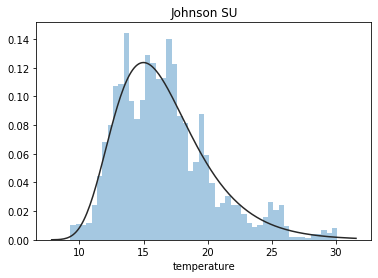

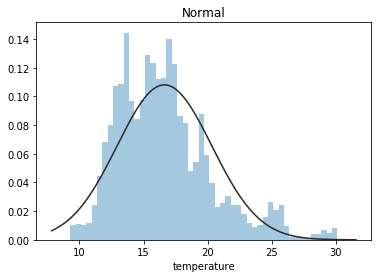

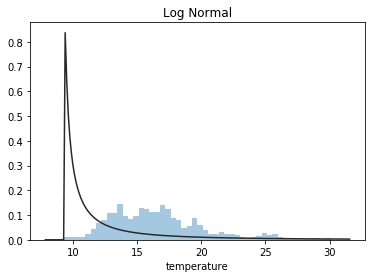

In [21]:
y = train['temperature']
plt.figure(1)
plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2)
plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3)
plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm);

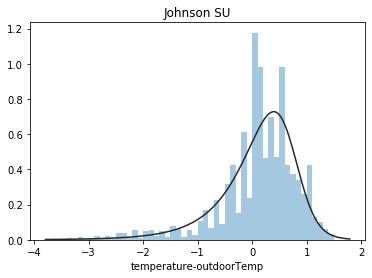

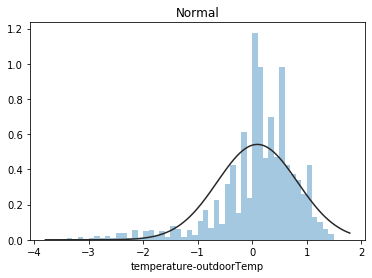

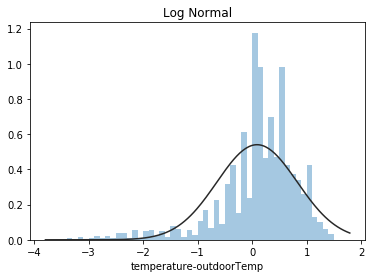

In [22]:
y = train['temperature-outdoorTemp']
plt.figure(1)
plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2)
plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3)
plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm);

Skewness: 0.926085
Kurtosis: 0.933827


(time                        0.042563
 year                        0.000000
 month                       2.722189
 day                        -0.971769
 hour                       -0.145425
 min                        -0.004005
 sec                        -0.009804
 outdoorTemp                 0.980080
 outdoorHum                 -0.790642
 outdoorAtmo               -17.654660
 indoorHum                  -0.917261
 indoorAtmo                -12.681374
 temperature                 0.926085
 indoorHum-outdoorHum        0.734739
 indoorAtmo-outdoorAtmo     -7.688591
 temperature-outdoorTemp    -1.487604
 dtype: float64,
 time                        -1.200271
 year                         0.000000
 month                        5.410747
 day                          0.590072
 hour                        -1.165767
 min                         -1.197135
 sec                         -1.180270
 outdoorTemp                  1.025864
 outdoorHum                  -0.196982
 outdoorAtmo            

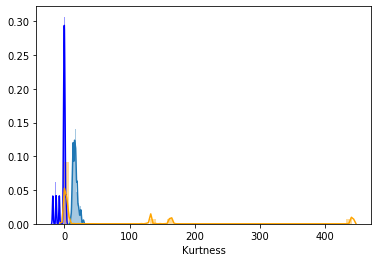

In [23]:
sns.distplot(train['temperature']);
print("Skewness: %f" % train['temperature'].skew())
print("Kurtosis: %f" % train['temperature'].kurt())
sns.distplot(train.skew(), color='blue', axlabel ='Skewness')
sns.distplot(train.kurt(), color='orange', axlabel ='Kurtness')
train.skew(), train.kurt()

Skewness: -1.487604
Kurtosis: 3.339852


(time                        0.042563
 year                        0.000000
 month                       2.722189
 day                        -0.971769
 hour                       -0.145425
 min                        -0.004005
 sec                        -0.009804
 outdoorTemp                 0.980080
 outdoorHum                 -0.790642
 outdoorAtmo               -17.654660
 indoorHum                  -0.917261
 indoorAtmo                -12.681374
 temperature                 0.926085
 indoorHum-outdoorHum        0.734739
 indoorAtmo-outdoorAtmo     -7.688591
 temperature-outdoorTemp    -1.487604
 dtype: float64,
 time                        -1.200271
 year                         0.000000
 month                        5.410747
 day                          0.590072
 hour                        -1.165767
 min                         -1.197135
 sec                         -1.180270
 outdoorTemp                  1.025864
 outdoorHum                  -0.196982
 outdoorAtmo            

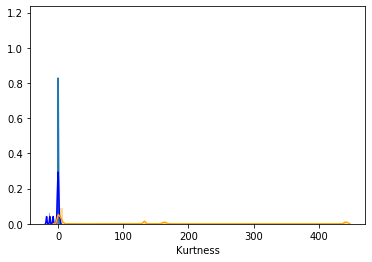

In [24]:
sns.distplot(train['temperature-outdoorTemp']);
print("Skewness: %f" % train['temperature-outdoorTemp'].skew())
print("Kurtosis: %f" % train['temperature-outdoorTemp'].kurt())
sns.distplot(train.skew(), color='blue', axlabel ='Skewness')
sns.distplot(train.kurt(), color='orange', axlabel ='Kurtness')
train.skew(), train.kurt()

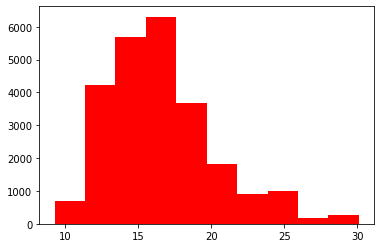

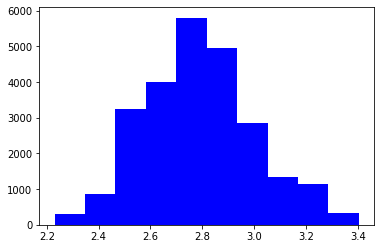

In [25]:
plt.hist(train['temperature'], orientation='vertical',histtype='bar', color='red')
plt.show()
plt.hist(np.log(train['temperature']), orientation='vertical',histtype='bar', color='blue')
plt.show()

In [26]:
numerical_features = train.select_dtypes(include=[np.number])
numerical_features.columns

Index(['time', 'year', 'month', 'day', 'hour', 'min', 'sec', 'outdoorTemp',
       'outdoorHum', 'outdoorAtmo', 'indoorHum', 'indoorAtmo', 'temperature',
       'indoorHum-outdoorHum', 'indoorAtmo-outdoorAtmo',
       'temperature-outdoorTemp'],
      dtype='object')

In [27]:
categorical_features = train.select_dtypes(include=[np.object])
categorical_features.columns

Index([], dtype='object')

In [28]:
numerical_features = ['outdoorTemp', 'outdoorHum', 'outdoorAtmo', 'indoorHum', 'indoorAtmo', 'indoorHum-outdoorHum', 'indoorAtmo-outdoorAtmo']
categorical_features = ['time', 'year', 'month', 'day', 'hour', 'min', 'sec']

In [29]:
numerical_features.append('temperature')
numerical_features.append('temperature-outdoorTemp')
print(numerical_features)

['outdoorTemp', 'outdoorHum', 'outdoorAtmo', 'indoorHum', 'indoorAtmo', 'indoorHum-outdoorHum', 'indoorAtmo-outdoorAtmo', 'temperature', 'temperature-outdoorTemp']


temperature-outdoorTemp    1.000000
outdoorHum                 0.796995
indoorHum                  0.728198
outdoorAtmo                0.143849
indoorAtmo                 0.073317
indoorAtmo-outdoorAtmo    -0.001305
temperature               -0.723480
outdoorTemp               -0.800750
indoorHum-outdoorHum      -0.887829
Name: temperature-outdoorTemp, dtype: float64 



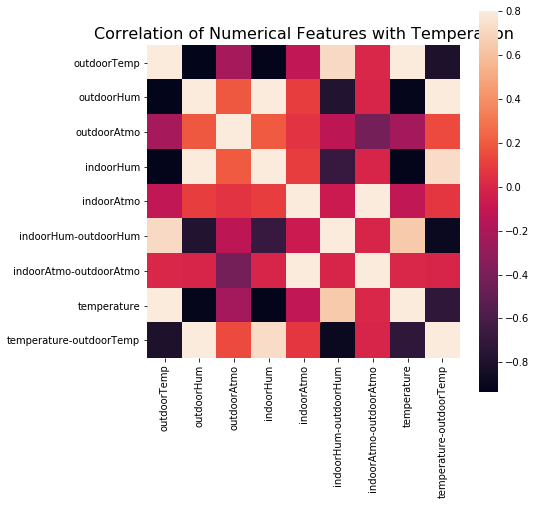

In [30]:
temperature_numerical = train[numerical_features]
correlation = temperature_numerical.corr()
print(correlation['temperature-outdoorTemp'].sort_values(ascending=False), '\n')
f, ax = plt.subplots(figsize=(7, 7))
plt.title('Correlation of Numerical Features with Temperation', y=1, size=16)
sns.heatmap(correlation, square=True, vmax=0.8)
del temperature_numerical['temperature-outdoorTemp']

In [31]:
for col in numerical_features:
    print('{:15}'.format(col), 
          'Skewness: {:05.2f}'.format(train[col].skew()) , 
          '   ',
          'Kurtosis: {:06.2f}'.format(train[col].kurt())  
         )

outdoorTemp     Skewness: 00.98     Kurtosis: 001.03
outdoorHum      Skewness: -0.79     Kurtosis: -00.20
outdoorAtmo     Skewness: -17.65     Kurtosis: 441.79
indoorHum       Skewness: -0.92     Kurtosis: 000.12
indoorAtmo      Skewness: -12.68     Kurtosis: 163.19
indoorHum-outdoorHum Skewness: 00.73     Kurtosis: 001.22
indoorAtmo-outdoorAtmo Skewness: -7.69     Kurtosis: 132.29
temperature     Skewness: 00.93     Kurtosis: 000.93
temperature-outdoorTemp Skewness: -1.49     Kurtosis: 003.34


In [32]:
for col in ['outdoorTemp', 'outdoorHum', 'outdoorAtmo', 'indoorHum', 'indoorAtmo', 'indoorHum-outdoorHum', 'indoorAtmo-outdoorAtmo']:
    print('{:15}'.format(col), 
          'Skewness: {:05.2f}'.format(test[col].skew()) , 
          '   ',
          'Kurtosis: {:06.2f}'.format(test[col].kurt())  
         )

outdoorTemp     Skewness: 00.61     Kurtosis: -00.31
outdoorHum      Skewness: -0.25     Kurtosis: -00.99
outdoorAtmo     Skewness: -0.95     Kurtosis: 016.83
indoorHum       Skewness: -0.35     Kurtosis: -00.88
indoorAtmo      Skewness: -9.68     Kurtosis: 093.87
indoorHum-outdoorHum Skewness: 01.14     Kurtosis: 002.09
indoorAtmo-outdoorAtmo Skewness: -9.48     Kurtosis: 091.29


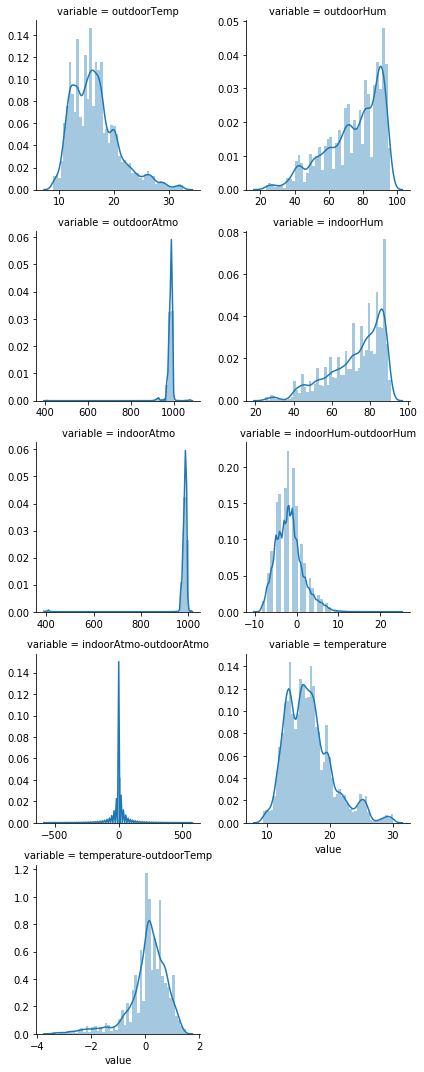

In [33]:
f = pd.melt(train, value_vars=numerical_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

In [34]:
numerical_features

['outdoorTemp',
 'outdoorHum',
 'outdoorAtmo',
 'indoorHum',
 'indoorAtmo',
 'indoorHum-outdoorHum',
 'indoorAtmo-outdoorAtmo',
 'temperature',
 'temperature-outdoorTemp']

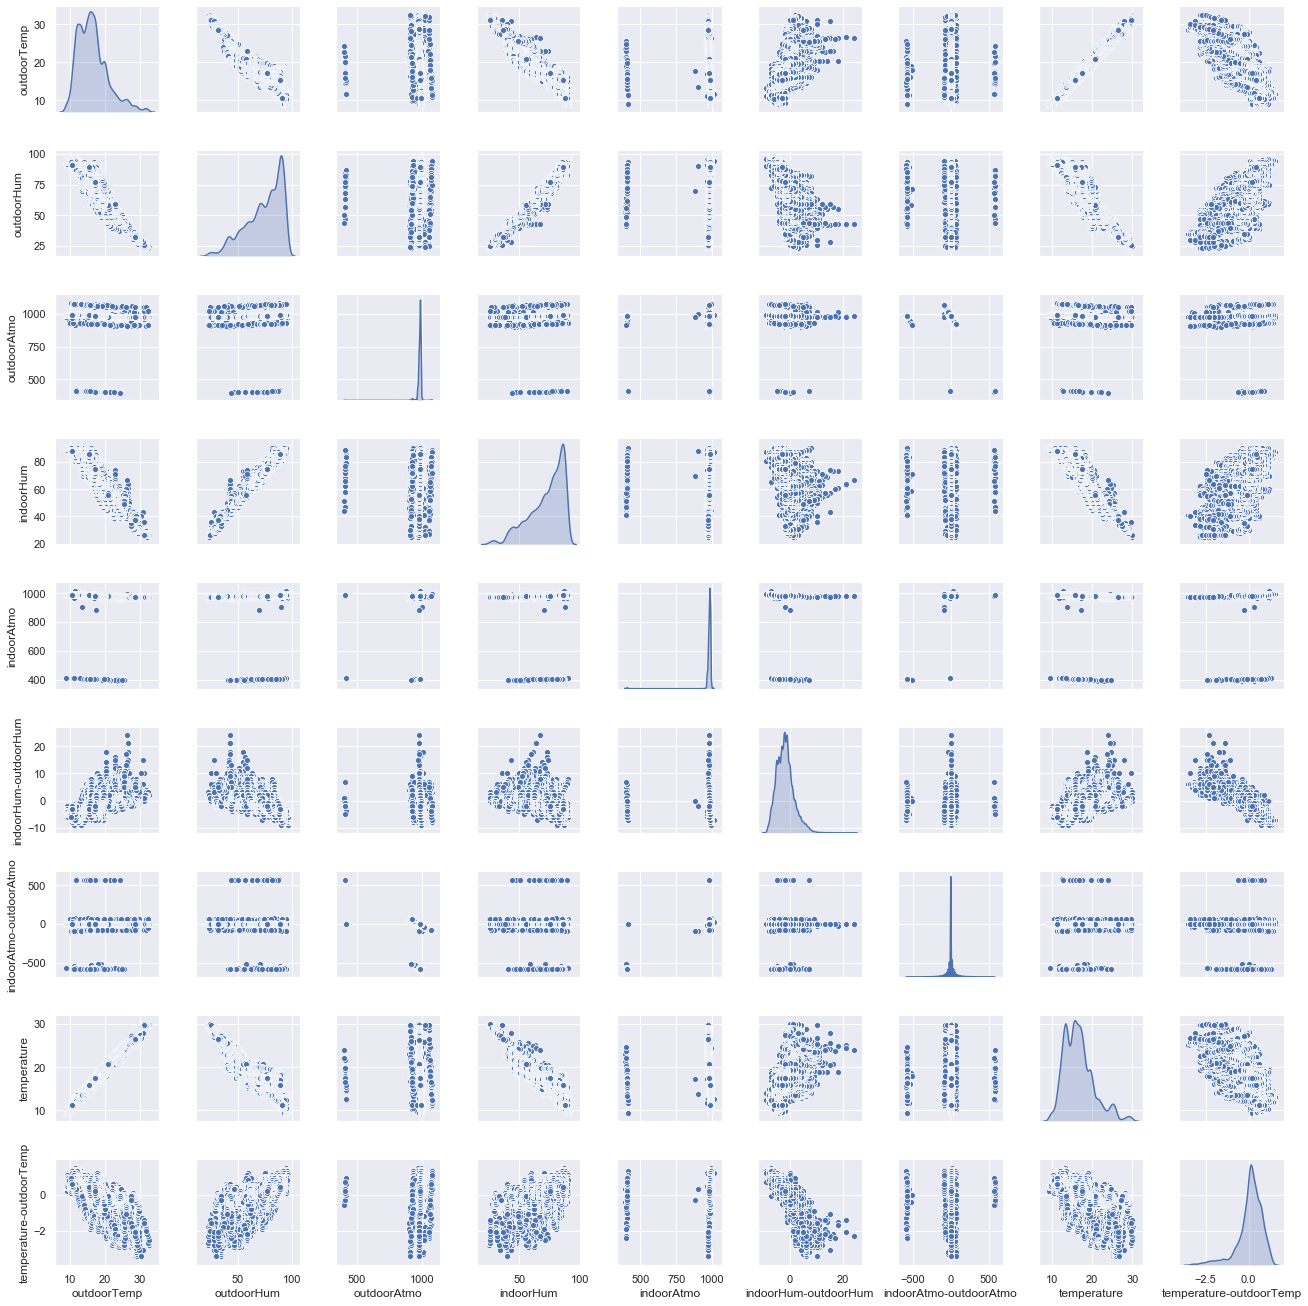

In [35]:
sns.set()
columns = numerical_features
sns.pairplot(train[columns], height=2 ,kind='scatter', diag_kind='kde')
plt.show()

## 相关性分析

### outdoorTemp
#### temperature与outdoorTemp

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


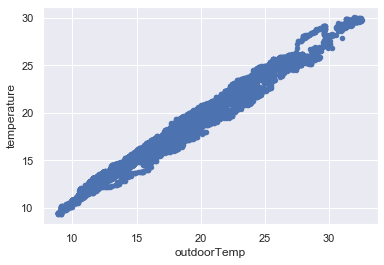

In [36]:
train.plot.scatter(x='outdoorTemp', y='temperature')

#### temperature-outdoorTemp与outdoorTemp

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


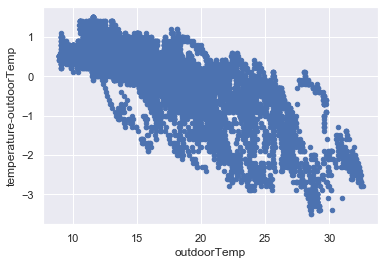

In [37]:
train.plot.scatter(x='outdoorTemp', y='temperature-outdoorTemp')

### outdoorHum
#### temperature与outdoorHum

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


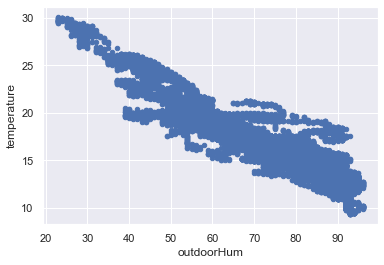

In [38]:
train.plot.scatter(x='outdoorHum', y='temperature')

#### temperature-outdoorTemp与outdoorHum

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


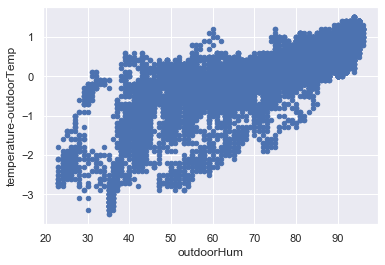

In [39]:
train.plot.scatter(x='outdoorHum', y='temperature-outdoorTemp')

### outdoorAtmo
#### temperature与outdoorAtmo

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


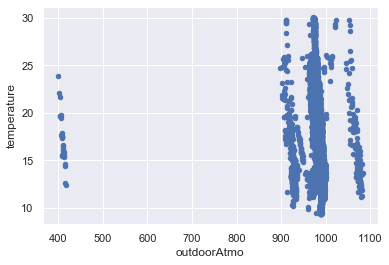

In [40]:
train.plot.scatter(x='outdoorAtmo', y='temperature')

#### temperature-outdoorTemp与outdoorAtmo

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


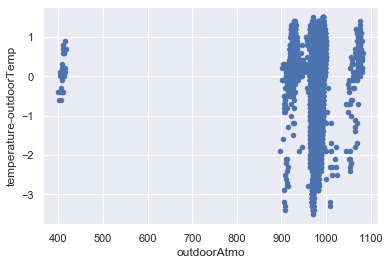

In [41]:
train.plot.scatter(x='outdoorAtmo', y='temperature-outdoorTemp')

### indoorHum
#### temperature与indoorHum

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


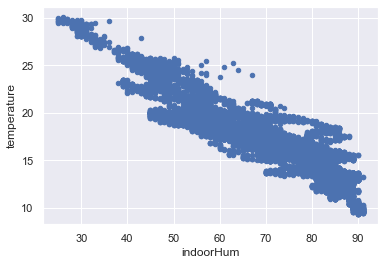

In [42]:
train.plot.scatter(x='indoorHum', y='temperature')

#### temperature-outdoorTemp与indoorHum

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


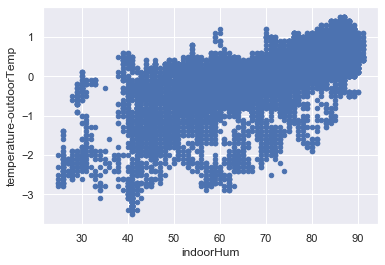

In [43]:
train.plot.scatter(x='indoorHum', y='temperature-outdoorTemp')

### indoorAtmo
#### temperature与indoorAtmo

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


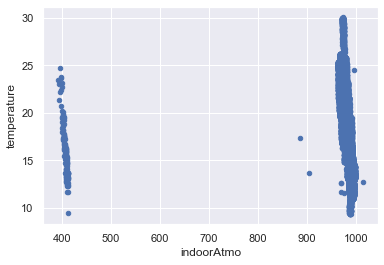

In [44]:
train.plot.scatter(x='indoorAtmo', y='temperature')

#### temperature-outdoorTemp与indoorAtmo

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


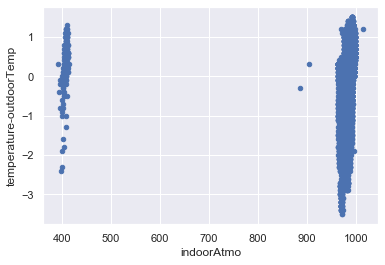

In [45]:
train.plot.scatter(x='indoorAtmo', y='temperature-outdoorTemp')

In [46]:
indoorAtmo_500 = train[train['indoorAtmo'] < 500]

In [47]:
indoorAtmo_500['day'].unique()

array([14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30,
       31,  1,  2], dtype=int64)

## 室内气压
分布一致

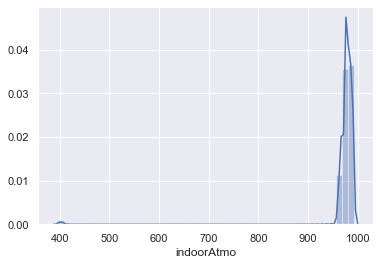

In [48]:
sns.distplot(test['indoorAtmo'])

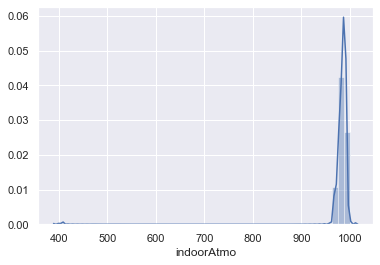

In [49]:
sns.distplot(train['indoorAtmo'])

## 室外气压
分布基本一致

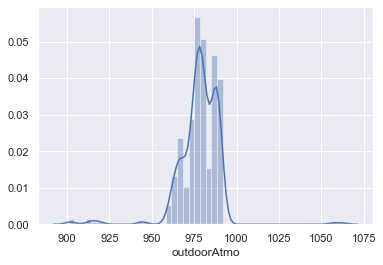

In [50]:
sns.distplot(test['outdoorAtmo'])

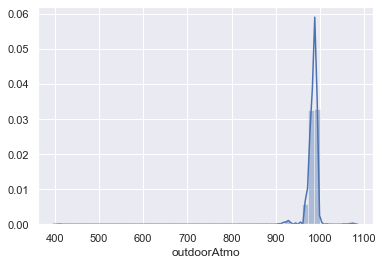

In [51]:
sns.distplot(train['outdoorAtmo'])

## 室外湿度
基本一致

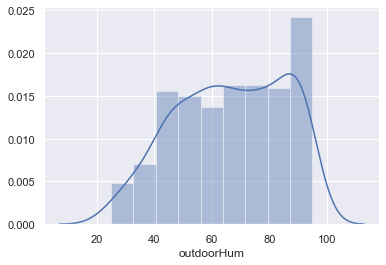

In [52]:
sns.distplot(test['outdoorHum'])

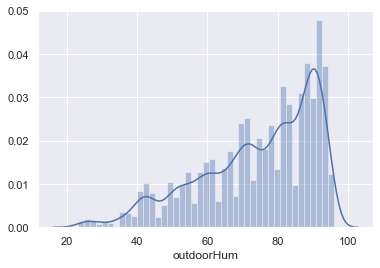

In [53]:
sns.distplot(train['outdoorHum'])

## 室内湿度

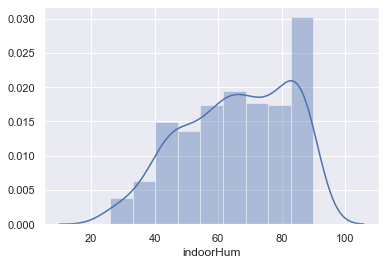

In [54]:
sns.distplot(test['indoorHum'])

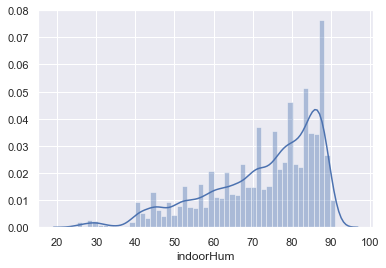

In [55]:
sns.distplot(train['indoorHum'])

## 室外温度

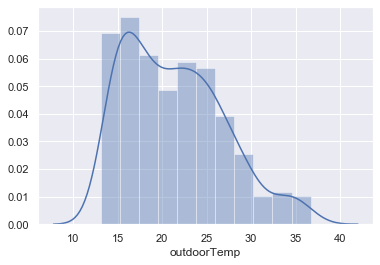

In [56]:
sns.distplot(test['outdoorTemp'])

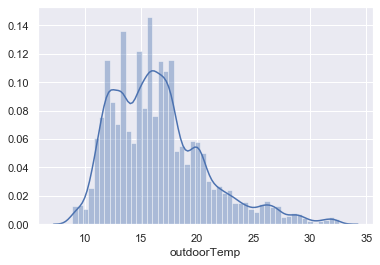

In [57]:
sns.distplot(train['outdoorTemp'])

## 差值

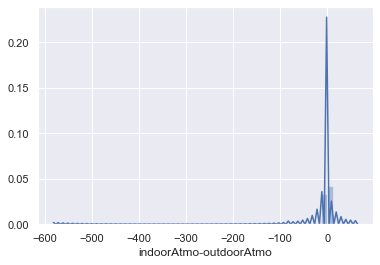

In [58]:
sns.distplot(test['indoorAtmo-outdoorAtmo'])

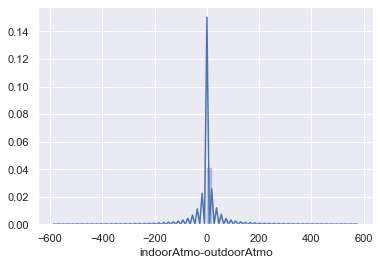

In [59]:
sns.distplot(train['indoorAtmo-outdoorAtmo'])

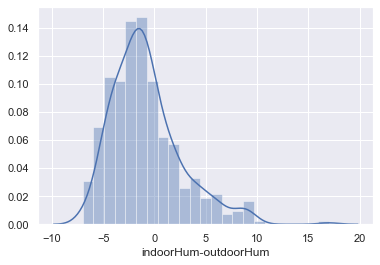

In [60]:
sns.distplot(test['indoorHum-outdoorHum'])

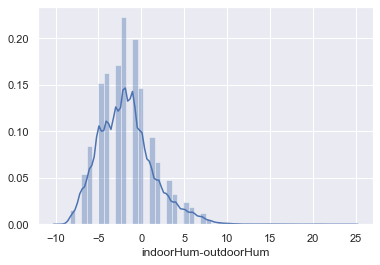

In [61]:
sns.distplot(train['indoorHum-outdoorHum'])

## 室内温度

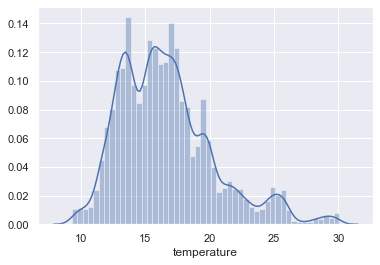

In [62]:
sns.distplot(train['temperature'])

## 室内温度-室外温度

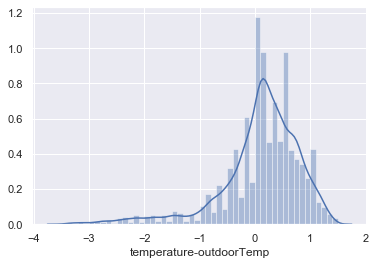

In [63]:
sns.distplot(train['temperature-outdoorTemp'])